# TENSORFLOW TUTORIAL


In [1]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


importing tensorflow

In [2]:
import tensorflow as tf
print(tf.version)

<module 'tensorflow._api.v2.version' from 'c:\\Users\\Admin\\anaconda3\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>


Creating tensors

In [3]:
string = tf.Variable("string",tf.string)

In [4]:
string

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'string'>

In [5]:
number = tf.Variable(99,tf.int16)

In [6]:
number

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=99>

rank of tensor:
It simples gives the number of dimentions in tensor

In [7]:
rank1 = tf.Variable(["arjun","monty python and flying circus"],tf.string)
tf.rank(rank1)

tank2 = tf.Variable([["arjun"],["nty python and flying circus"]],tf.string)
tf.rank(tank2)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [8]:
tank2.shape #shape is the number of total elemets in the array

TensorShape([2, 1])

In [9]:
#changing shape of tensor

tensor1 = tf.ones([1,2,3]) #cretaes a tensor of shape 1,2,3
tensor2 = tf.reshape(tensor1,[2,3,1]) #converts tensor of shape 1,2,3 to 2,3,1
tensor3 = tf.reshape(tensor2,[3,-1]) #converts tensor of shape 2,3,1 to 3,2    -1 tells the tensor to calculate the size of the dimension in that place 

print(tensor1)
print(tensor2)
print(tensor3)

tf.Tensor(
[[[1. 1. 1.]
  [1. 1. 1.]]], shape=(1, 2, 3), dtype=float32)
tf.Tensor(
[[[1.]
  [1.]
  [1.]]

 [[1.]
  [1.]
  [1.]]], shape=(2, 3, 1), dtype=float32)
tf.Tensor(
[[1. 1.]
 [1. 1.]
 [1. 1.]], shape=(3, 2), dtype=float32)


In [10]:
#evualtion of tensor
with tf.compat.v1.Session() as sess:
  tensor1 = tf.ones([1,2,3])
  tft = tensor1*tensor1
  print(tft.eval())

[[[1. 1. 1.]
  [1. 1. 1.]]]


<h2>Core ML algorithms</h2>

In [11]:

import tensorflow as tf
print(tf.version)

t = tf.ones([5,5,5,5])
#print(t)

t = tf.reshape(t,[125,-1])
print(t)

<module 'tensorflow._api.v2.version' from 'c:\\Users\\Admin\\anaconda3\\lib\\site-packages\\tensorflow\\_api\\v2\\version\\__init__.py'>
tf.Tensor(
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1

In [12]:
#Linear Regression
!pip install -q sklearn

In [13]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

In [14]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

In [15]:

print(y_train.head())

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


In [16]:
dftrain.loc[6]

sex                        female
age                          27.0
n_siblings_spouses              0
parch                           2
fare                      11.1333
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 6, dtype: object

In [17]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [18]:
dftrain.shape

(627, 9)

<AxesSubplot:>

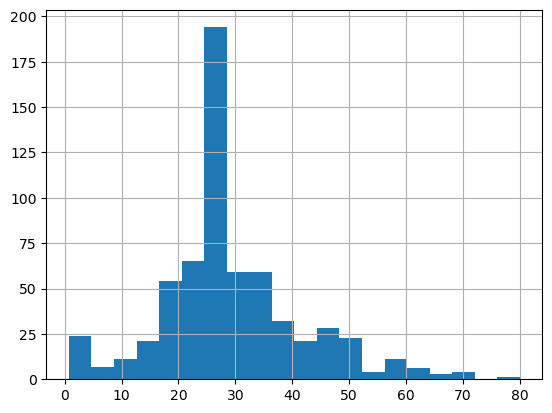

In [19]:
dftrain.age.hist(bins=20)

<AxesSubplot:>

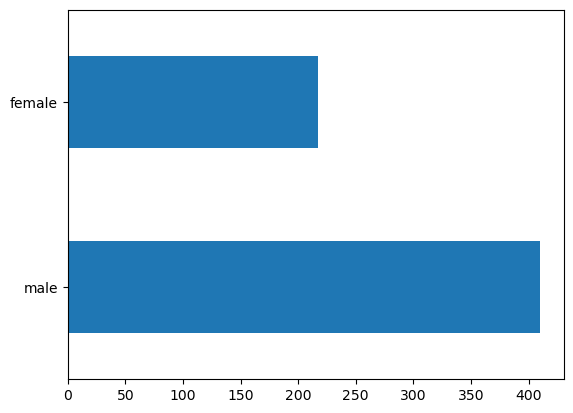

In [20]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

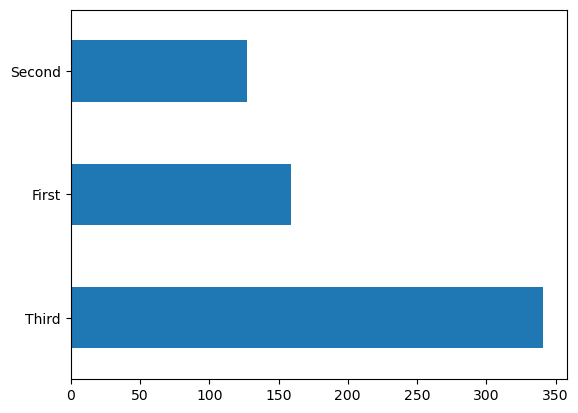

In [21]:
dftrain['class'].value_counts().plot(kind='barh')

In [22]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')

CATEGORICAL_COLUMNS = ['sex','n_siblings_spouses','parch','class','deck','embark_town','alone']
NUMERIC_COLUMNS = ['age','fare']

feature_columns = []
for name in CATEGORICAL_COLUMNS:
    voc = dftrain[name].unique()
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(name,voc))

for name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(name,dtype=tf.float32))


In [23]:
print(feature_columns)

[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', vocabulary_list=('Third', 'First', 'Second'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='deck', vocabulary_list=('unknown', 'C', 'G', 'A', 'B', 'D', 'F', 'E'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='embark_town', vocabulary_list=('Southampton', 'Cherbourg', 'Queenstown', 'unknown'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='alone', vocabulary_list=('n', 'y'), dtype=tf.string, def

In [24]:
def make_input_fn(data_df,label_df,num_epochs=10,shuffle=True,batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
        if shuffle:
            ds = ds.shuffle(1000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(dftrain,y_train)
eval_input_fn = make_input_fn(dfeval,y_eval,num_epochs=100,shuffle=False)
linear_set  = tf.estimator.LinearClassifier(feature_columns=feature_columns)

linear_set.train(train_input_fn)
result = linear_set.evaluate(eval_input_fn)

#clear_output()
print(result)


INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\tmpplx9_h14', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
Use Variable.read_v

In [25]:
result = list(linear_set.predict(eval_input_fn))
x = 7
print(y_eval.loc[x])
print(dfeval.loc[x])
print(result[x]['probabilities'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmpplx9_h14\model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
0
sex                          male
age                          21.0
n_siblings_spouses              0
parch                           0
fare                         8.05
class                       Third
deck                      unknown
embark_town           Southampton
alone                           y
Name: 7, dtype: object
[0.8823293  0.11767074]


<h2>Classification</h2>

In [26]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import pandas as pd




In [30]:
CSV_COLUMN_NAMES = ['SepalLength', 'SepalWidth','PetalLenght','PetalWidth','Species']
SPECIES = ['Setosa', 'Versicolor', 'Virginica']

In [31]:
train_path = tf.keras.utils.get_file("iris_training.csv","https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file("iris_test.csv","https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path,names=CSV_COLUMN_NAMES,header=0)
test = pd.read_csv(test_path,names=CSV_COLUMN_NAMES,header=0)

In [32]:
train.head()

,SepalLength,SepalWidth,PetalLenght,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [33]:
train_y = train.pop('Species')
test_y = test.pop('Species')

In [36]:
train_y.head()

0    2
1    1
2    2
3    0
4    0
Name: Species, dtype: int64

In [37]:
#input functions
def input_fn(features,labels,training=True,batch_size=256):
    dataset = tf.data.Dataset.from_tensor_slices((dict(features),labels))
    if training:
        dataset = dataset.shuffle(1000).repeat()
    return dataset.batch(batch_size)


In [38]:
#feature columns
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)


[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLenght', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]


In [43]:
#building DNN
classifier = tf.estimator.DNNClassifier(
    feature_columns = my_feature_columns,
    hidden_units=[25,15],
    n_classes=3
)

classifier.train(
    input_fn=lambda:input_fn(train,train_y,training=True),
    steps=10000
)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': 'C:\\Users\\Admin\\AppData\\Local\\Temp\\tmp3issvzm9', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorf

In [44]:
classifier.evaluate(input_fn=lambda:input_fn(test,test_y,training=False))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2023-01-15T10:45:40
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmp3issvzm9\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.17799s
INFO:tensorflow:Finished evaluation at 2023-01-15-10:45:40
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.93333334, average_loss = 0.31085446, global_step = 10000, loss = 0.31085446
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 10000: C:\Users\Admin\AppData\Local\Temp\tmp3issvzm9\model.ckpt-10000


{'accuracy': 0.93333334,
 'average_loss': 0.31085446,
 'loss': 0.31085446,
 'global_step': 10000}

In [47]:
#predictions
def input_fn(features,batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size) 

features = ['SepalLength','SepalWidth','PetalLenght','PetalWidth']
predict = {}

print("Please type numeric values as prompted.")
for feature in features:
    valid = True
    while valid:
        val = input(feature + ": ")
        if not val.isdigit(): valid = False

    predict[feature] = [float(val)]

predictions = classifier.predict(input_fn=lambda:input_fn(predict))
for pred_dict in predictions:
    print(pred_dict)
    class_id = pred_dict['class_ids'][0]
    probability = pred_dict['probabilities'][class_id]

    print('Prediction is "{}" ({:.1f}%)'.format(SPECIES[class_id],100*probability))

Please type numeric values as prompted.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from C:\Users\Admin\AppData\Local\Temp\tmp3issvzm9\model.ckpt-10000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
{'logits': array([ 0.0186332, -0.4426495,  0.5483884], dtype=float32), 'probabilities': array([0.30039132, 0.18938904, 0.51021963], dtype=float32), 'class_ids': array([2], dtype=int64), 'classes': array([b'2'], dtype=object), 'all_class_ids': array([0, 1, 2]), 'all_classes': array([b'0', b'1', b'2'], dtype=object)}
Prediction is "Virginica" (51.0%)
